In [13]:
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 18,8

In [14]:
path_to_repo   = '/home/hargy/Documents/3CS/repo_data3cs/data3cs'
local_to_study = '/studies/long_run_1/coll1'
tot_path       = f'{path_to_repo}{local_to_study}'

In [15]:
def extract_data(path, ori = "0", wl='450'):
    
    f = h5.File(path)
    gp = f['spectra'][wl][ori]['10.0sec']
    
    sp_data = gp['sp_data']; bg_data = gp['bg_data']; powers = gp['power_samples']
    
    return sp_data, bg_data, powers

def gaussian(x,m,s,A):
    return A * np.exp(-(x-m)**2/(2*s**2))

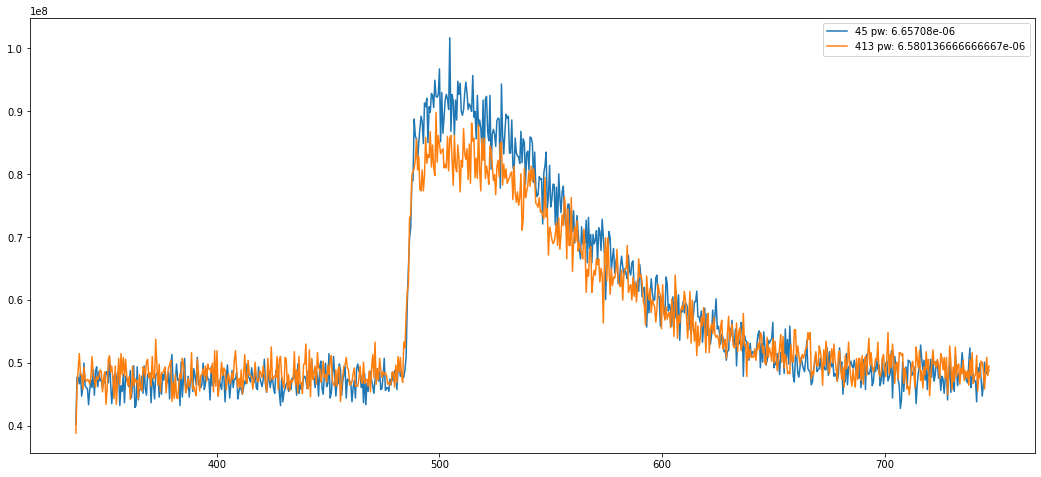

In [61]:
num_arr = [45,413]
it = 3
for n in num_arr:
    sp, bg, pw = extract_data(f'{tot_path}/LiF_B2_148_{n}.hdf5'); 
    
    y = np.divide(sp[it]['count'], pw[it])
    
    plt.plot(sp[it]['em_wl'], y, label =f'{n} pw: {pw[it]}')

plt.legend()
#plt.ylim(275,750)

In [62]:
it = 3; sp10, bg10, pw10 = extract_data(f'{tot_path}/LiF_B2_148_10.hdf5'); sp412, bg412, pw412 = extract_data(f'{tot_path}/LiF_B2_148_412.hdf5')
em_wl = sp10[it]['em_wl']

# calculate areas without scaling
area_10 = np.trapz(sp10[it]['count'], em_wl) ; area_412 = np.trapz(sp412[it]['count'], em_wl)
ratio   = area_10/area_412

# now scale for power
y_10 = np.divide(sp10[it]['count'], pw10[it]) ; y_412 = np.divide(sp412[it]['count'], pw412[it])
area_10s = np.trapz(y_10, em_wl) ; area_412s = np.trapz(y_412, em_wl)
ratio_s = area_10s/area_412s

In [44]:
ratio

1.0363475247032934

In [45]:
ratio_s

1.0316479257934654

In [47]:
area_10s, area_412s

(23824325811.042892, 23093465527.708035)

In [48]:
area_10, area_412

(157488.4027557373, 151964.85638427734)